## Time dependent Schrodinger equation 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv
from matplotlib.animation import FuncAnimation, PillowWriter

### Parameters

In [2]:
V0 = 1.7
L = 500
x0 = 200
q = 2
sigma = 20
a = 250
b = 260
N_x = 1000
dx = L/N_x
dt = 0.1
N_t = 5000
alpha = dt/(2*dx**2)

### Solve the problem

In [4]:
#Space grid and potential
x = np.linspace(0, L, N_x+1)
V = np.zeros((N_x+1))

V[(x>=a) & (x<=b)] = V0

In [5]:
#Initial wave function 
psi_0 = np.exp(1j*q*x)*np.exp(-(x-x0)**2/(2*sigma)**2)
psi_0 = psi_0/np.sqrt(np.sum(np.abs(psi_0)**2)) 

In [6]:
#M matrix
M = np.diag(1+2*1j*alpha-1j*dt*V)
M += np.diag(np.full((N_x), 1j*alpha), -1)
M += np.diag(np.full((N_x), 1j*alpha), +1)

In [7]:
#Set to zero the extremes
M[0, :] = np.zeros(N_x+1)
M[-1, :] = np.zeros(N_x+1)

In [8]:
#Define C
C = np.dot(0.5*inv(np.eye(N_x+1)-0.5*M), M)

In [9]:
#Define the psi-over-time tensor
psi = np.zeros((N_x+1, N_t+1), dtype=np.complex128)
psi[:, 0] = psi_0

In [10]:
%%time
#Time evolution
for k in range(N_t):
    psi[:, k+1] = np.matmul(C, psi[:, k])
    psi[:, k+1] = psi[:, k+1]/np.sqrt(np.sum(np.abs(psi[:, k+1])**2))

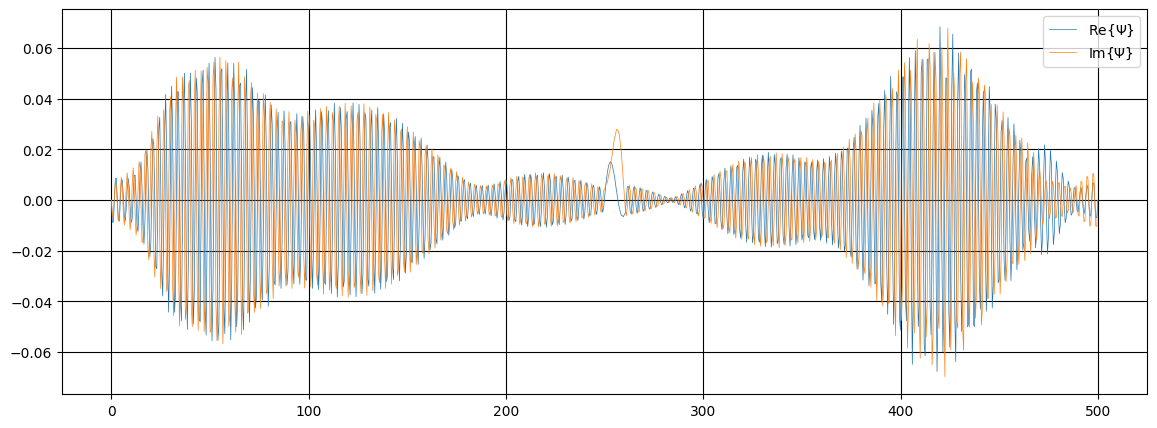

In [11]:
#Static plot
t = 1000

plt.figure(figsize=(14, 5))
plt.grid(c="black")
plt.plot(x, np.real(psi[:, t]), lw=0.5, label="Re$\{\Psi\}}$")
plt.plot(x, np.imag(psi[:, t]), lw=0.5, label="Im$\{\Psi\}}$")

plt.legend()

In [12]:
#Get the pdf
rho = np.abs(psi)**2

CPU times: user 1min 57s, sys: 2.22 s, total: 1min 59s
Wall time: 2min 2s


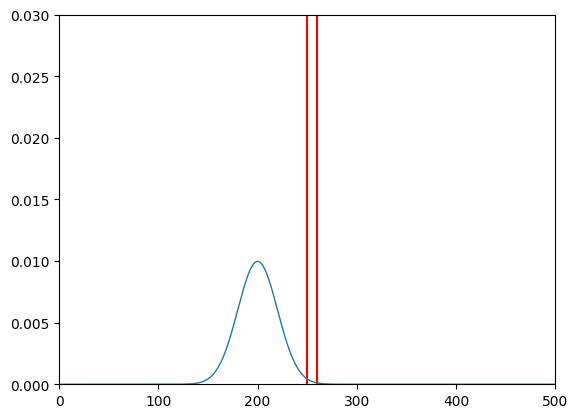

In [15]:
%%time
#Animation
fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    ax.vlines(a, 0, 0.03, color="red")
    ax.vlines(b, 0, 0.03, color="red")
    
    ax.set_xlim([0, 500])
    ax.set_ylim([0, 0.03])
    ax.plot(x, rho[:, 2*t], lw=1)

anim = FuncAnimation(fig, animate, 1000)
anim.save("psi.gif", writer=PillowWriter(fps=30))